In [6]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objs as go
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Load data
data = pd.read_csv("usa_combined.csv")
data['ef'] = np.log(data['ef'] - data['ef'].min() + 1)

In [13]:
data.head()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval,data_from,Unnamed: 8
0,2010,1982,D,0.299627,CH4,0.0,8.0,usa_emfac,NaN
1,2010,1982,D,0.234037,CH4,9.0,16.0,usa_emfac,NaN
2,2010,1982,D,0.125487,CH4,17.0,24.0,usa_emfac,NaN
3,2010,1982,D,0.057162,CH4,25.0,32.0,usa_emfac,NaN
4,2010,1982,D,0.039678,CH4,33.0,40.0,usa_emfac,NaN


In [14]:
data = data.drop(['Unnamed: 8','data_from'], axis=1)
data.fillna(0,inplace=True)

In [15]:
data.tail()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval
277337,2022,2022,G,0.046997,VOC,84.5,92.5
277338,2022,2022,G,0.052076,VOC,92.5,100.6
277339,2022,2022,G,0.084572,VOC,100.6,108.6
277340,2022,2022,G,0.113762,VOC,108.6,116.7
277341,2022,2022,G,0.132678,VOC,116.7,120.7


In [16]:
# Split data into train and test sets based on reference year
train_data = data[data['reference_year'] < 2020]
test_data = data[data['reference_year'] >= 2020]

In [17]:
train_data.head()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval
0,2010,1982,D,0.299627,CH4,0.0,8.0
1,2010,1982,D,0.234037,CH4,9.0,16.0
2,2010,1982,D,0.125487,CH4,17.0,24.0
3,2010,1982,D,0.057162,CH4,25.0,32.0
4,2010,1982,D,0.039678,CH4,33.0,40.0


In [18]:
test_data.head()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval
194644,2020,2006,CNG,2.938997,CH4,0.0,8.0
194645,2020,2006,CNG,2.739413,CH4,9.0,16.0
194646,2020,2006,CNG,2.416644,CH4,17.0,24.0
194647,2020,2006,CNG,2.127577,CH4,25.0,32.0
194648,2020,2006,CNG,1.873189,CH4,33.0,40.0


In [19]:
# create dummy variables for the pollutant column
train_data = pd.get_dummies(train_data, columns=['pollutant'])
test_data = pd.get_dummies(test_data, columns=['pollutant'])
train_data = pd.get_dummies(train_data, columns=['fuel_type'])
test_data = pd.get_dummies(test_data, columns=['fuel_type'])

In [20]:
#test_data = pd.DataFrame(X_test, columns=X.columns)
for lag in range(1, 4):
    test_data[f'emissions_lag{lag}'] = test_data['ef'].shift(lag).fillna(0)
    train_data[f'emissions_lag{lag}'] = train_data['ef'].shift(lag).fillna(0)

In [21]:
test_data.head()

,reference_year,model_year,ef,lower_speed_interval,upper_speed_interval,pollutant_CH4,pollutant_CO,pollutant_CO2,pollutant_EC,pollutant_HONO,...,pollutant_SOX,pollutant_THC,pollutant_TOG,pollutant_VOC,fuel_type_CNG,fuel_type_D,fuel_type_G,emissions_lag1,emissions_lag2,emissions_lag3
194644,2020,2006,2.938997,0.0,8.0,True,False,False,False,False,...,False,False,False,False,True,False,False,0.000000,0.000000,0.000000
194645,2020,2006,2.739413,9.0,16.0,True,False,False,False,False,...,False,False,False,False,True,False,False,2.938997,0.000000,0.000000
194646,2020,2006,2.416644,17.0,24.0,True,False,False,False,False,...,False,False,False,False,True,False,False,2.739413,2.938997,0.000000
194647,2020,2006,2.127577,25.0,32.0,True,False,False,False,False,...,False,False,False,False,True,False,False,2.416644,2.739413,2.938997
194648,2020,2006,1.873189,33.0,40.0,True,False,False,False,False,...,False,False,False,False,True,False,False,2.127577,2.416644,2.739413


In [22]:
train_data.head()

,reference_year,model_year,ef,lower_speed_interval,upper_speed_interval,pollutant_CH4,pollutant_CO,pollutant_CO2,pollutant_EC,pollutant_HONO,...,pollutant_SOX,pollutant_THC,pollutant_TOG,pollutant_VOC,fuel_type_CNG,fuel_type_D,fuel_type_G,emissions_lag1,emissions_lag2,emissions_lag3
0,2010,1982,0.299627,0.0,8.0,True,False,False,False,False,...,False,False,False,False,False,True,False,0.000000,0.000000,0.000000
1,2010,1982,0.234037,9.0,16.0,True,False,False,False,False,...,False,False,False,False,False,True,False,0.299627,0.000000,0.000000
2,2010,1982,0.125487,17.0,24.0,True,False,False,False,False,...,False,False,False,False,False,True,False,0.234037,0.299627,0.000000
3,2010,1982,0.057162,25.0,32.0,True,False,False,False,False,...,False,False,False,False,False,True,False,0.125487,0.234037,0.299627
4,2010,1982,0.039678,33.0,40.0,True,False,False,False,False,...,False,False,False,False,False,True,False,0.057162,0.125487,0.234037


In [23]:
features = ['reference_year','fuel_type_D','fuel_type_CNG','fuel_type_D','pollutant_CH4', 'pollutant_CO', 'pollutant_CO2','pollutant_EC', 'pollutant_N2O','pollutant_PM25','emissions_lag3']
target = ['ef']

In [24]:
# create an instance of SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# fit and transform the training data with the imputer
train_data_imputed = imputer.fit_transform(train_data[features])

# transform the test data with the fitted imputer
test_data_imputed = imputer.transform(test_data[features])

### Random Forest Model Using Lasso regression

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
# Fit a Lasso regression model to the training data
lasso_model = Lasso(alpha=0.5, max_iter=10000)
lasso_model.fit(train_data_imputed, train_data[target])
lasso_coefs = lasso_model.coef_

# Select only the important features from the training and test data
train_data_imputed_selected = train_data_imputed[:, lasso_coefs != 0]
test_data_imputed_selected = test_data_imputed[:, lasso_coefs != 0]

In [26]:
# Select only the important features from the training and test data
train_data_imputed_selected = train_data_imputed[:, lasso_coefs != 0]
test_data_imputed_selected = test_data_imputed[:, lasso_coefs != 0]

# Fit a new random forest model with the selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(train_data_imputed_selected, train_data[target])

# Make predictions on the train and test data using the new model
y_train_pred_selected = rf_model_selected.predict(train_data_imputed_selected)
y_test_pred_selected = rf_model_selected.predict(test_data_imputed_selected)

In [27]:
# Calculate the mean squared error and R-squared score for both the train and test data
train_mse_selected = mean_squared_error(train_data[target], y_train_pred_selected)
test_mse_selected = mean_squared_error(test_data[target], y_test_pred_selected)
train_r2_selected = r2_score(train_data[target], y_train_pred_selected)
test_r2_selected = r2_score(test_data[target], y_test_pred_selected)
print("Train MSE:", train_mse_selected)
print("Test MSE:", test_mse_selected)
print("Train R^2:", train_r2_selected)
print("Test R^2:", test_r2_selected)

Train MSE: 0.1344902354670876
Test MSE: 0.61345211274484
Train R^2: 0.9886457875776444
Test R^2: 0.9599787663199233


Model is performing very well on both the training and testing data. The train and test MSEs are both very small, which indicates that the model is accurately predicting the target variable. The R^2 values for both train and test are also very high, which suggests that the model is explaining a high proportion of the variance in the target variable. Overall, these metrics indicate that the model is performing very well and is likely a good fit for the data.

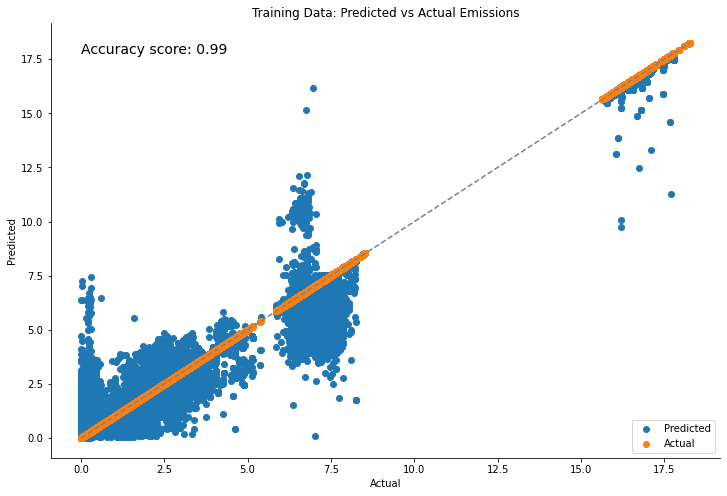

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define colors for predicted and actual data points
colors = ['tab:blue', 'tab:orange']

# Create scatter plot of predicted versus actual target values for training data
plt.figure(figsize=(12, 8))
plt.scatter(train_data[target], y_train_pred_selected, c=colors[0], label='Predicted')
plt.scatter(train_data[target], train_data[target], c=colors[1], label='Actual')
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Add diagonal line
plt.plot([train_data[target].min(), train_data[target].max()], [train_data[target].min(), train_data[target].max()], linestyle='--', color='gray')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data: Predicted vs Actual Emissions')
# Set legend position
plt.legend(loc='lower right')

# Calculate R2 score
r2 = r2_score(train_data[target], y_train_pred_selected)

# Print R2 score
plt.text(train_data[target].min(), train_data[target].max(), f"Accuracy score: {r2:.2f}", ha='left', va='top', fontsize=14)

plt.show()


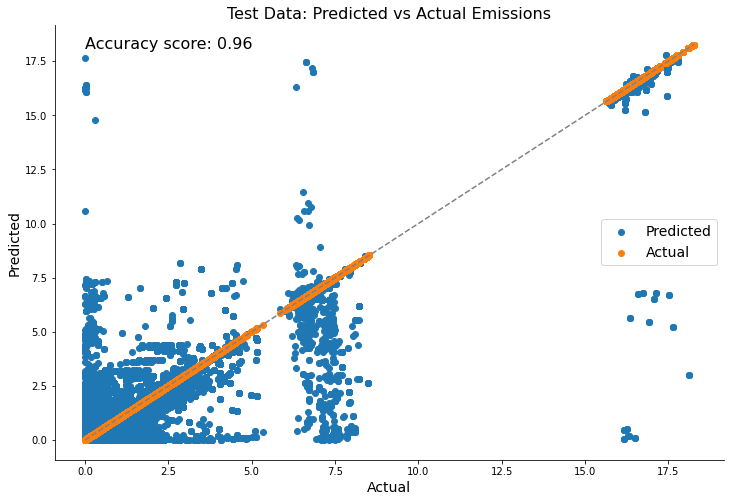

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Define colors for predicted and actual data points
colors = ['tab:blue', 'tab:orange']

# Create scatter plot of predicted versus actual target values for test data
plt.figure(figsize=(12, 8))
plt.scatter(test_data[target], y_test_pred_selected, c=colors[0], label='Predicted')
plt.scatter(test_data[target], test_data[target], c=colors[1], label='Actual')
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Add diagonal line
plt.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], linestyle='--', color='gray')

plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Test Data: Predicted vs Actual Emissions',fontsize=16)
plt.legend(fontsize=14)

# Calculate R2 score
r2 = r2_score(test_data[target], y_test_pred_selected)

# Print R2 score
plt.text(test_data[target].min(), test_data[target].max(), f"Accuracy score: {r2:.2f}", ha='left', va='center', fontsize=16)

plt.show()
